## (2019 Ford GoBike System Exploration)
## by Courage Siameh

## Introduction
    Increasing urbanization and road congestion are pushing commuters toward alternative modes of transportation for short and medium distance journeys.San Francisco Ford GoBike , managed by Motivate, provides the Bay Area’s bike share system. Bike share is a convenient, healthy, affordable, and fun form of transportation. It involves a fleet of specially designed bikes that are locked into a network of docking stations. Bikes can be unlocked from one station and returned to any other station in the system. People use bike share to commute to work or school, run errands, get to appointments, and more. The dataset contains 2019 trip data including start time, end time, start station, end station, and latitude/longitude for each station to mention a few.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#####  Gathering

In [2]:
ford_gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_gobike.sample(10)

duration_sec                start_time                  end_time  \
58243          1040  2019-02-21 07:02:33.3530  2019-02-21 07:19:54.2490   
12552           984  2019-02-27 17:19:19.8930  2019-02-27 17:35:44.5770   
24299           129  2019-02-25 18:33:06.0840  2019-02-25 18:35:15.1040   
57074           436  2019-02-21 08:35:53.9020  2019-02-21 08:43:10.1860   
9982            155  2019-02-27 22:30:13.2210  2019-02-27 22:32:48.4750   
14798           376  2019-02-27 11:03:47.4870  2019-02-27 11:10:04.3330   
58879           944  2019-02-20 21:57:56.6630  2019-02-20 22:13:41.4920   
34443           451  2019-02-24 00:28:40.2260  2019-02-24 00:36:11.6300   
34435           274  2019-02-24 00:36:27.0700  2019-02-24 00:41:01.9190   
50414           477  2019-02-21 19:13:14.4390  2019-02-21 19:21:12.0420   

       start_station_id                                start_station_name  \
58243              73.0                            Pierce St at Haight St   
12552               8.0                     The Embarcadero at Vallejo St   
24299             114.0                        Rhode Island St at 17th St   
57074             371.0                        Lombard St at Columbus Ave   
9982              240.0                         Haste St at Telegraph Ave   
14798              86.0                           Market St at Dolores St   
58879             129.0                            Harrison St at 20th St   
34443               5.0      Powell St BART Station (Market St at 5th St)   
34435             160.0                         West Oakland BART Station   
50414              17.0  Embarcadero BART Station (Beale St at Market St)   

       start_station_latitude  start_station_longitude  end_station_id  \
58243               37.771793              -122.433708           355.0   
12552               37.799953              -122.398525            91.0   
24299               37.764478              -122.402570           345.0   
57074               37.802746              -122.413579            20.0   
9982                37.866043              -122.258804           267.0   
14798               37.769305              -122.426826            77.0   
58879               37.758862              -122.412544            86.0   
34443               37.783899              -122.408445           369.0   
34435               37.805318              -122.294837           230.0   
50414               37.792251              -122.397086            36.0   

                                      end_station_name  end_station_latitude  \
58243                          23rd St at Tennessee St             37.755367   
12552                              Berry St at King St             37.771762   
24299                            Hubbell St at 16th St             37.766483   
57074  Mechanics Monument Plaza (Market St at Bush St)             37.791300   
9982                           Derby St at College Ave             37.861804   
14798                             11th St at Natoma St             37.773507   
58879                          Market St at Dolores St             37.769305   
34443                               Hyde St at Post St             37.787349   
34435                          14th St at Mandela Pkwy             37.810743   
50414                              Folsom St at 3rd St             37.783830   

       end_station_longitude  bike_id   user_type  member_birth_year  \
58243            -122.388795   5844.0  Subscriber             1996.0   
12552            -122.398438   3392.0  Subscriber             1985.0   
24299            -122.398279   6308.0  Subscriber             1988.0   
57074            -122.399051   6293.0  Subscriber             1985.0   
9982             -122.253569   6630.0  Subscriber             1997.0   
14798            -122.416040   6520.0  Subscriber             1988.0   
58879            -122.426826   5960.0  Subscriber             1979.0   
34443            -122.416651   5727.0  Subscriber            

##### Assessing

In [3]:
#displaying the dimensions or shape of our dataset here 
print(ford_gobike.shape)

(63377, 16)


In [4]:
#here we display a summary of our data
ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63377 entries, 0 to 63376
Data columns (total 16 columns):
duration_sec               63377 non-null int64
start_time                 63377 non-null object
end_time                   63377 non-null object
start_station_id           63294 non-null float64
start_station_name         63294 non-null object
start_station_latitude     63377 non-null float64
start_station_longitude    63377 non-null float64
end_station_id             63293 non-null float64
end_station_name           63293 non-null object
end_station_latitude       63376 non-null float64
end_station_longitude      63376 non-null float64
bike_id                    63376 non-null float64
user_type                  63376 non-null object
member_birth_year          60687 non-null float64
member_gender              60687 non-null object
bike_share_for_all_trip    63376 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 7.7+ MB


In [5]:
# finding unique values in the data
ford_gobike.nunique()

duration_sec                3237
start_time                 63375
end_time                   63373
start_station_id             327
start_station_name           327
start_station_latitude       331
start_station_longitude      332
end_station_id               326
end_station_name             326
end_station_latitude         331
end_station_longitude        331
bike_id                     4035
user_type                      2
member_birth_year             70
member_gender                  3
bike_share_for_all_trip        2
dtype: int64

In [6]:
# lo0king total number of duplicates here 
ford_gobike.duplicated().sum()

0

In [7]:
#this assigns total sum values to the user_type ,[subscriber & customer]
ford_gobike.user_type.value_counts()

Subscriber    56294
Customer       7082
Name: user_type, dtype: int64

In [8]:
#displaying the value counts for the bike_share_for_all_trip column 

ford_gobike.bike_share_for_all_trip.value_counts()

No     57395
Yes     5981
Name: bike_share_for_all_trip, dtype: int64

In [9]:
# assigning total no. of values in the member_gender column [male, female & other]
ford_gobike.member_gender.value_counts()

Male      45155
Female    14243
Other      1289
Name: member_gender, dtype: int64

In [10]:
#value counts of bike ID's
ford_gobike.bike_id.value_counts()

5034.0    70
6104.0    64
5849.0    62
6141.0    61
6644.0    60
5825.0    60
5250.0    60
6510.0    59
6293.0    59
5253.0    58
6084.0    58
4934.0    58
5296.0    57
6473.0    57
6093.0    57
6525.0    57
4659.0    56
6558.0    56
4743.0    56
5848.0    56
5193.0    55
5145.0    55
6448.0    55
6207.0    55
4967.0    55
4933.0    55
6635.0    55
5319.0    55
6114.0    54
4834.0    54
          ..
3340.0     1
3754.0     1
2401.0     1
1431.0     1
604.0      1
3756.0     1
3815.0     1
31.0       1
5634.0     1
3733.0     1
4250.0     1
900.0      1
1958.0     1
3536.0     1
3114.0     1
584.0      1
1545.0     1
3509.0     1
312.0      1
3603.0     1
1351.0     1
5455.0     1
515.0      1
6061.0     1
1581.0     1
3532.0     1
2050.0     1
2635.0     1
307.0      1
3232.0     1
Name: bike_id, Length: 4035, dtype: int64

##### Cleaning

In [11]:
# making a copy of the data before cleaning
gobike_copy = ford_gobike.copy()

In [12]:
gobike_copy.sample(10)

duration_sec                start_time                  end_time  \
61223           548  2019-02-20 17:52:10.6180  2019-02-20 18:01:18.6870   
36640           383  2019-02-23 15:43:17.2090  2019-02-23 15:49:40.7210   
58967           865  2019-02-20 21:35:37.9660  2019-02-20 21:50:03.7120   
30066           143  2019-02-24 22:28:53.1960  2019-02-24 22:31:16.5890   
11659           532  2019-02-27 18:22:24.6270  2019-02-27 18:31:17.2290   
19410           788  2019-02-26 16:57:02.8750  2019-02-26 17:10:11.2720   
9404            296  2019-02-28 07:19:58.9330  2019-02-28 07:24:54.9340   
30992           596  2019-02-24 17:48:57.1040  2019-02-24 17:58:54.0060   
44722          1409  2019-02-22 13:45:12.5960  2019-02-22 14:08:42.5570   
6973           1185  2019-02-28 09:17:09.9060  2019-02-28 09:36:55.6800   

       start_station_id                                 start_station_name  \
61223              67.0  San Francisco Caltrain Station 2  (Townsend St...   
36640              16.0                            Steuart St at Market St   
58967             126.0                                        Esprit Park   
30066             278.0                             The Alameda at Bush St   
11659              81.0                                 Berry St at 4th St   
19410             130.0                           22nd St Caltrain Station   
9404              364.0                           China Basin St at 3rd St   
30992             240.0                          Haste St at Telegraph Ave   
44722              13.0                     Commercial St at Montgomery St   
6973               22.0                              Howard St at Beale St   

       start_station_latitude  start_station_longitude  end_station_id  \
61223               37.776639              -122.395526            61.0   
36640               37.794130              -122.394430           284.0   
58967               37.761634              -122.390648           139.0   
30066               37.331932              -121.904888           276.0   
11659               37.775880              -122.393170            27.0   
19410               37.757288              -122.392051           361.0   
9404                37.772000              -122.389970            79.0   
30992               37.866043              -122.258804            18.0   
44722               37.794231              -122.402923            11.0   
6973                37.789756              -122.394643           364.0   

                                        end_station_name  \
61223                                Howard St at 8th St   
36640  Yerba Buena Center for the Arts (Howard St at ...   
58967           Garfield Square (25th St at Harrison St)   
30066                           Julian St at The Alameda   
11659                            Beale St at Harrison St   
19410                          Mendell St at Fairfax Ave   
9404                                7th St at Brannan St   
30992                      Telegraph Ave at Alcatraz Ave   
44722                             Davis St at Jackson St   
6973                            China Basin St at 3rd St   

       end_station_latitude  end_station_longitude  bike_id   user_type  \
61223             37.776513            -122.411306   4716.0  Subscriber   
36640             37.784872            -122.400876   6536.0  Subscriber   
58967             37.751017            -122.411901   4798.0  Subscriber   
30066             37.332233            -121.912517   3913.0  Subscriber   
11659             37.788059            -122.391865   3554.0  Subscriber   
19410             37.739853            -122.385655   4633.0    Customer   
9404              37.773492            -122.403673   4332.0  Subscriber   
30992             37.850222            -122.260172   1246.0    Customer   
44722             37.797280            -122.398436   5276.0    Customer   
6973              37.772000            -122.389970   6327.0  Subscriber   

       member_birth_

In [13]:
# re-checking shape of new copy data for validation
gobike_copy.shape

(63377, 16)

In [14]:
gobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63377 entries, 0 to 63376
Data columns (total 16 columns):
duration_sec               63377 non-null int64
start_time                 63377 non-null object
end_time                   63377 non-null object
start_station_id           63294 non-null float64
start_station_name         63294 non-null object
start_station_latitude     63377 non-null float64
start_station_longitude    63377 non-null float64
end_station_id             63293 non-null float64
end_station_name           63293 non-null object
end_station_latitude       63376 non-null float64
end_station_longitude      63376 non-null float64
bike_id                    63376 non-null float64
user_type                  63376 non-null object
member_birth_year          60687 non-null float64
member_gender              60687 non-null object
bike_share_for_all_trip    63376 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 7.7+ MB


##### Issue #1
    fixing the issue of wrong data types for the columns 
    [ 'start_date', 'start_time','start_station_id', 'end_station_id', 'bike_id','user_type','member_gender'] 

In [15]:
 # issue #1 - fixing  multiple columns with incorrect dtypes 
gobike_copy['start_time'] = pd.to_datetime(gobike_copy['start_time'])
gobike_copy['end_time'] = pd.to_datetime(gobike_copy['end_time'])

gobike_copy['start_station_id'] = gobike_copy['start_station_id'].astype('str')
gobike_copy['end_station_id'] = gobike_copy['end_station_id'].astype('str')
gobike_copy['bike_id'] = gobike_copy['bike_id'].astype('str')

gobike_copy['user_type'] = gobike_copy['user_type'].astype('category')
gobike_copy['member_gender'] = gobike_copy['member_gender'].astype('category')

gobike_copy.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63377 entries, 0 to 63376
Data columns (total 16 columns):
duration_sec               63377 non-null int64
start_time                 63377 non-null datetime64[ns]
end_time                   63377 non-null datetime64[ns]
start_station_id           63377 non-null object
start_station_name         63294 non-null object
start_station_latitude     63377 non-null float64
start_station_longitude    63377 non-null float64
end_station_id             63377 non-null object
end_station_name           63293 non-null object
end_station_latitude       63376 non-null float64
end_station_longitude      63376 non-null float64
bike_id                    63377 non-null object
user_type                  63376 non-null category
member_birth_year          60687 non-null float64
member_gender              60687 non-null category
bike_share_for_all_trip    63376 non-null object
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), object(6)
memory usag

##### Issue #2
    adding new columns, thus new columns from existing columns for easy analysis 

In [16]:
'''addressing issue #2 by adding new columns for trip duration in minute,
trip start date in yyyy-mm-dd format, trip start hour of the day, 
day of week and month '''

gobike_copy['duration_minute'] = gobike_copy['duration_sec']/60

gobike_copy['start_date'] = gobike_copy.start_time.dt.strftime('%Y-%m-%d')
gobike_copy['start_hour_of_day'] = gobike_copy.start_time.dt.strftime('%H')
gobike_copy['start_day_of_week'] = gobike_copy.start_time.dt.strftime('%A')
gobike_copy['start_month'] = gobike_copy.start_time.dt.strftime('%B')

gobike_copy.sample(6)

duration_sec              start_time                end_time  \
50754           546 2019-02-21 18:43:24.688 2019-02-21 18:52:31.165   
48660           510 2019-02-22 07:25:20.532 2019-02-22 07:33:51.502   
935             130 2019-02-28 20:08:53.247 2019-02-28 20:11:03.979   
51905           464 2019-02-21 17:40:11.317 2019-02-21 17:47:55.845   
17498           414 2019-02-27 05:50:28.542 2019-02-27 05:57:23.328   
10100           974 2019-02-27 21:38:36.443 2019-02-27 21:54:50.650   

      start_station_id         start_station_name  start_station_latitude  \
50754             19.0       Post St at Kearny St               37.788975   
48660             81.0         Berry St at 4th St               37.775880   
935              240.0  Haste St at Telegraph Ave               37.866043   
51905            345.0      Hubbell St at 16th St               37.766483   
17498            357.0        2nd St at Julian St               37.341132   
10100            277.0  Morrison Ave at Julian St               37.333658   

       start_station_longitude end_station_id  \
50754              -122.403452           30.0   
48660              -122.393170           19.0   
935                -122.258804          253.0   
51905              -122.398279           43.0   
17498              -121.892844          317.0   
10100              -121.908586          311.0   

                                        end_station_name  \
50754     San Francisco Caltrain (Townsend St at 4th St)   
48660                               Post St at Kearny St   
935                              Haste St at College Ave   
51905  San Francisco Public Library (Grove St at Hyde...   
17498                          San Salvador St at 9th St   
10100                     Paseo De San Antonio at 2nd St   

       end_station_latitude     ...      bike_id   user_type  \
50754             37.776598     ...       2231.0  Subscriber   
48660             37.788975     ...       6115.0  Subscriber   
935               37.866418     ...       6385.0  Subscriber   
51905             37.778768     ...       6253.0  Subscriber   
17498             37.333955     ...       3777.0  Subscriber   
10100             37.333798     ...       6128.0  Subscriber   

      member_birth_year  member_gender bike_share_for_all_trip  \
50754            1970.0           Male                      No   
48660            1994.0           Male                      No   
935              1988.0         Female                      No   
51905            1989.0           Male                      No   
17498            1994.0           Male                     Yes   
10100            1997.0           Male                     Yes   

      duration_minute  start_date start_hour_of_day start_day_of_week  \
50754        9.100000  2019-02-21                18          Thursday   
48660        8.500000  2019-02-22                07            Friday   
935          2.166667  2019-02-28                20          Thursday   
51905        7.733333  2019-02-21                17          Thursday   
17498        6.900000  2019-02-27                05         Wednesday   
10100       16.233333  2019-02-27                21         Wednesday   

      start_month  
50754    February  
48660    February  
935      February  
51905    February  
17498    February  
10100    February  

[6 rows x 21 columns]

##### Issue #3
    The member_birth_year can be used to find the current age of bikers. 
    With 2019 as the current year in the dataset, a new column can be created from subtracting the current year 
    from each year value in the ['member_birth_age'] column displaying the current age of bikers or riders.

In [17]:
# addressing issue 3 by appending new column that calculates bikers' age from 'member_birth_year' 

gobike_copy['member_age'] = 2019 - gobike_copy['member_birth_year']
gobike_copy.member_age.value_counts() 

31.0     3520
26.0     3279
30.0     3116
29.0     2978
27.0     2970
28.0     2940
33.0     2803
25.0     2777
32.0     2747
24.0     2551
34.0     2367
35.0     2315
36.0     1959
37.0     1747
39.0     1701
23.0     1622
38.0     1557
40.0     1288
22.0     1246
21.0     1062
41.0      950
42.0      922
45.0      867
44.0      860
20.0      803
43.0      790
46.0      754
47.0      675
48.0      670
51.0      633
         ... 
62.0      304
59.0      294
60.0      203
61.0      162
63.0      144
65.0       89
67.0       70
68.0       63
72.0       61
69.0       61
64.0       57
66.0       49
74.0       41
88.0       38
70.0       32
119.0      23
76.0       15
71.0       15
73.0       10
77.0        8
18.0        8
86.0        8
118.0       3
99.0        3
85.0        2
78.0        2
80.0        1
91.0        1
141.0       1
75.0        1
Name: member_age, Length: 70, dtype: int64

    the results from running the code shows some outliers in the resulting data.
    the occurence of the ages above 70 for eg. 141, 86, 80, 91, 119, 118 ... are some major outliers.


In [18]:
# summary statistics on the member_age column
gobike_copy.member_age.describe()

count    60687.000000
mean        34.214197
std         10.196503
min         18.000000
25%         27.000000
50%         32.000000
75%         39.000000
max        141.000000
Name: member_age, dtype: float64

    In the summary statistics, min age of members is 18
    max age of members is 141 ( an outlier )

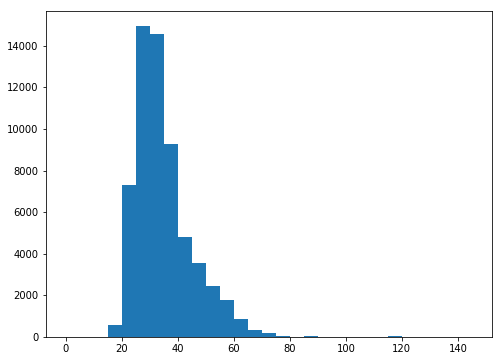

In [19]:
# plot the distribution of members' age, to assess visually for some outliers 

plt.figure(figsize=[8, 6])
bins = np.arange(0, gobike_copy['member_age'].max()+5, 5)
plt.hist(gobike_copy['member_age'].dropna(), bins=bins);

##### Issue #4
    filter out outlier ages from ['member_age'] column, thus occurance of ages > 70 years. 
    This is only logical in its rarity of seeing a 90 year old person biking.

In [20]:
#filtering out outlier ages
gobike_copy = gobike_copy.query('member_age <= 70')

##### Issue #5
    Changing the dtypes of the columns, 'member_birth_year' and 'member_age' to integer instead of float dtype.


In [21]:
#casting 'member_birth_year' , 'member_age' columns to int dtype
gobike_copy['member_birth_year'] = gobike_copy['member_birth_year'].astype('int')
gobike_copy['member_age'] = gobike_copy['member_age'].astype('int')
gobike_copy.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60454 entries, 0 to 63375
Data columns (total 22 columns):
duration_sec               60454 non-null int64
start_time                 60454 non-null datetime64[ns]
end_time                   60454 non-null datetime64[ns]
start_station_id           60454 non-null object
start_station_name         60373 non-null object
start_station_latitude     60454 non-null float64
start_station_longitude    60454 non-null float64
end_station_id             60454 non-null object
end_station_name           60373 non-null object
end_station_latitude       60454 non-null float64
end_station_longitude      60454 non-null float64
bike_id                    60454 non-null object
user_type                  60454 non-null category
member_birth_year          60454 non-null int64
member_gender              60454 non-null category
bike_share_for_all_trip    60454 non-null object
duration_minute            60454 non-null float64
start_date                 60454 no

##### Issue #6 
    it would be challenging using the longitude and latitude rather than a distance in km
    

In [22]:
#the longitude and latitude start and end points are enough to create a new column for distance in kilometers
# code follows

import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [23]:
gobike_copy['distance_km'] = gobike_copy.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

In [25]:
gobike_copy.distance_km.sample(4)

14151    0.588723
14334    1.172724
37269    0.941484
38658    0.714325
Name: distance_km, dtype: float64

    looks like we've sucessfully added the new data column 'distance_km' to out copy dataset, using the start and end latitudes and longitudes from our dataframe

In [26]:
# highest distance covered in km
gobike_copy.distance_km.max()

19.818861732213605

In [27]:
#least disatance covered in km
gobike_copy.distance_km.min()

0.0

### What is the structure of your dataset?

    > The ('201902-fordgobike-tripdata.csv') data contains 63377 entries of trip records with 16 data columns which can then be split into 4 major categories for easy exploration ,analysis and visualization:

    trip duration : With columns [
    duration_sec, 
    start_time, 
    end_time ]

    station info: With columns [
    start_station_id, 
    start_station_name, 
    start_station_latitude, 
    start_station_longitude, 
    end_station_id, 
    end_station_name, 
    end_station_latitude, 
    end_station_longitude ]

    member's information:With the columns [
    bike_id, 
    user_type, 
    member_birth_year, 
    member_gender,
    member_age, 
    bike_share_for_all_trip]

    trip info: With columns [
    duration_minute, 
    start_date, 
    start_hourofday, 
    start_dayofweek, 
    start_month]


### What is/are the main feature(s) of interest in your dataset?

     I'm most interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders'  user type, gender, age, to mention a few,to comprehend how long, what time, day or month the users required  the bike sharing service. Few questions raised to includes: When most trips taken in terms of time of day, day of the week, or month of the year? The duration an average trip takes? Is the duration of ride determined by the user_type , member_gender or member_age? 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

    Each trip's start date/time and duration information will help understanding how long a trip usually takes and when.
     the newly added data column, ['distance_km'] combined with other columns can be used to determine the correlation behind the data features. Members information will aid massively in comprehending the target user type, member age and gender and their correlation and and effects on key data insight and trends or patterns.


## Univariate Exploration

    In this section, we will begin investigating distributions of individual variables in our Ford GoBike Dataset.


##### -Gender with the most or highest bike ride counts

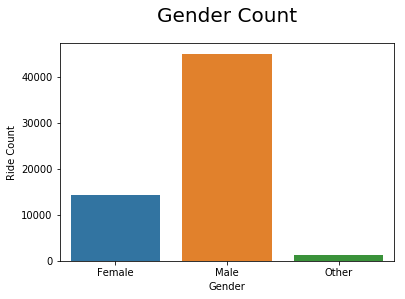

In [28]:
sb.countplot(data = gobike_copy, x = 'member_gender')
plt.title("Gender Count", fontsize=20, y=1.07)
plt.xlabel('Gender')
plt.ylabel('Ride Count');

    the countplot above shows the highest observation of gender, the males as having the most rides in our data.
    Three time the size of women is how many men or males frequently use the bike system.

#####    - A pie chart in finding the percentage gender distribution of total bikers

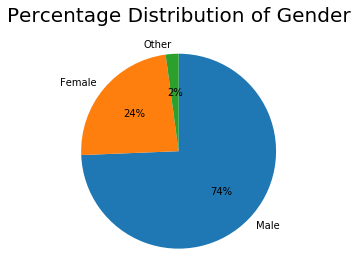

In [29]:
# using the pie chart too visualize the percentage gender distribution
sorted_counts = gobike_copy['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Percentage Distribution of Gender", fontsize=20, y=1.07)
plt.axis('square');

    the pie chart has 3 regions showing in proportion the percentage distribution of members gender, the male members in the lead with 74%, the female with 24% and other, 2%. This shows just how much influence the  male members have in the bike sharing service in San Francisco.

 ######   - a boxplot exploring ages of riders

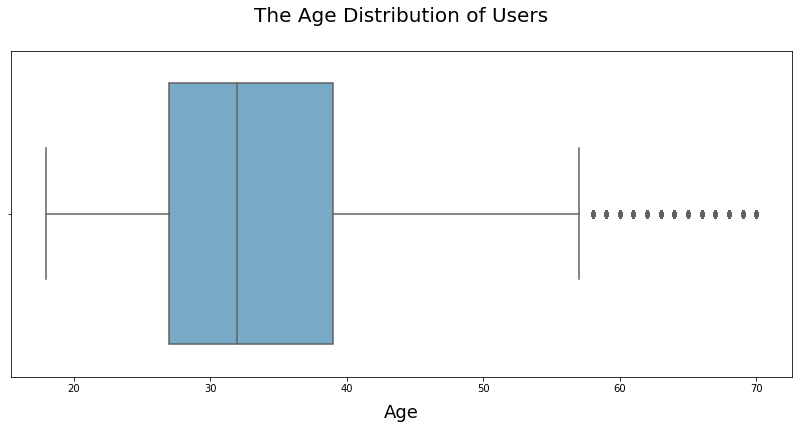

In [30]:
plt.figure(figsize=(14,6))
sb.boxplot(x='member_age', data=gobike_copy, palette='Blues')
plt.title("The Age Distribution of Users", fontsize=20, y=1.07)
plt.xlabel("Age", fontsize=18, labelpad=10);

    from the boxplot plot, the median age users lies between 30 and 35.
    the upper quartile with user age 48
    the lower quartile with use age 27
    an upper extreme with user age 57, beyond the upper extremes lies the outliers.


#####    - Plots exploring the trips distribution over hour-of-day, & day-of-week .

Text(0.5,1,'Distribution of trips by Days of the Week ')

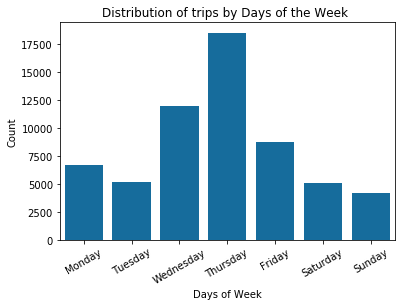

In [31]:
# trip distribution over weekdays

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# we cast 'start_day_of_week' to category dtype

weekdaycat = pd.api.types.CategoricalDtype(ordered = True, categories = weekday)
gobike_copy['start_day_of_week'] = gobike_copy['start_day_of_week'].astype(weekdaycat)

#plotting 
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data = gobike_copy, x ='start_day_of_week', color=base_color);
plt.xlabel('Days of Week');
plt.ylabel('Count');
plt.xticks(rotation = 30);
plt.title('Distribution of trips by Days of the Week ')

     there were more trips on work days (Monday to Friday) as compared to weekends which appeared lower or efficient.
     Days of the week like Wednesdsy,Thursday, and Friday have high bike rides or trip counts. Thursday, has the highest ride count in out plot, with over 17500 ride or trip counts.

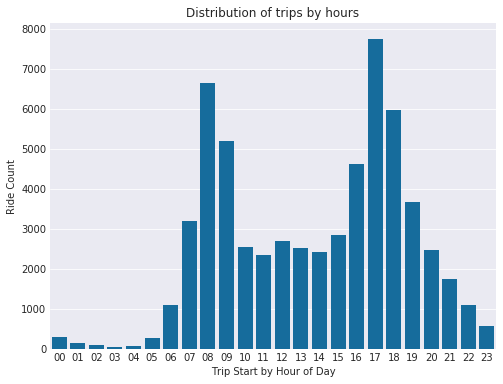

In [33]:
# distribution of trips by hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=gobike_copy, x='start_hour_of_day', color=base_color);
order = sorted(gobike_copy['start_hour_of_day'].unique());
plt.xlabel('Trip Start by Hour of Day');
plt.ylabel('Ride Count');
plt.title('Distribution of trips by hours');

    Most bikerides were quick and short, with durations times between 5 to 10 minutes,
    though we spotted some  outliers like the bike trip duration time being 20+hrs.

#####    Plotting to explore around members & users .

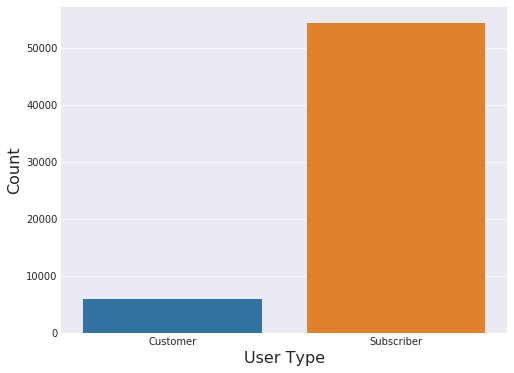

In [34]:
sb.countplot(data=gobike_copy, x='user_type') #;color=base_color
plt.xlabel('User Type', fontsize = 16);
plt.ylabel('Count', fontsize = 16);

    In exploring around user types, its observed from the countplot that the Subsriber users embark on more bike trips as compared to the customer user index.

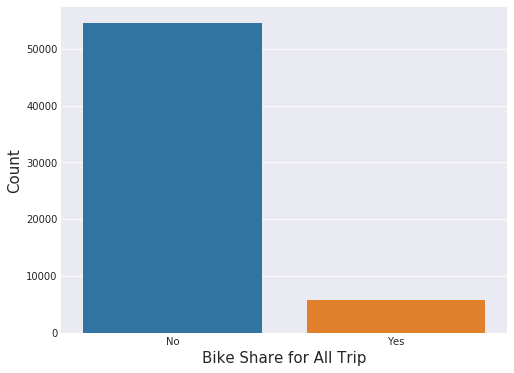

In [35]:
sb.countplot(data=gobike_copy, x='bike_share_for_all_trip' )
plt.xlabel('Bike Share for All Trip', fontsize = 15);
plt.ylabel('Count', fontsize = 15);

    The plot shows the count of bike share for all trip column values and counts, 'NO'appears with more counts as compared with yes.

#####  looking at the distance(km) traveled, in a histogram.

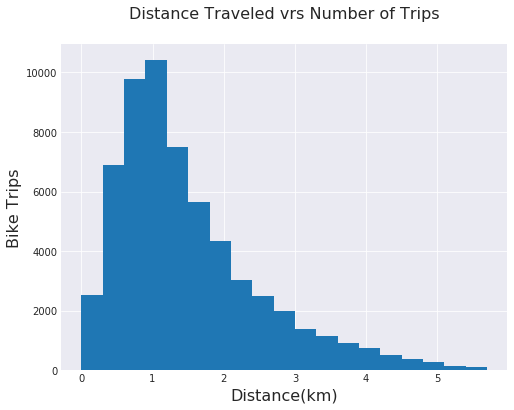

In [36]:
bin_edges = np.arange(0, 6, 0.3)
plt.hist(data = gobike_copy, x = 'distance_km', bins = bin_edges)
plt.title("Distance Traveled vrs Number of Trips", y = 1.06, fontsize = 16)
plt.xlabel('Distance(km)', fontsize = 16)
plt.ylabel('Bike Trips', fontsize = 16);

    More bikers  seem to cover or take short distance trips from 0 to 2km whereas an even lesser number of riders embark on long distant bike trips within the distances of 3 to 5km. time of day, day of the week, and gender amongst others are underlying factors with come correlation to our histogram data plot.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

    > From our countplot,it is evident that the number of trips taken by members peaked around 8-9am and 17-18pm during the day, there were more trips on work days (Monday to Friday) as compared to weekends which appeared lower or efficient. 

    >User-wise, there were more male riders(about 74%) than female(about 24%).
    Looking at the user type countplot, majority of most members were subscribers compared to casual riders.
    The majority of the members did not use bike share for all of their trips, and most were around 25 to 40 years old.

    >Most bikerides were quick and short, with durations times between 5 to 10 minutes, though we spotted some  outliers like the bike trip duration time being 24hrs.

    >No transformation was needed as the plots were easy to make out visually.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

    > The birth years of some members were obviously incorrect, as no rider could have been about 137 years old, that's an age too old and feeble enough for any person to undertake such a task of riding a bike.
    > the data for rows that didn't have gender or an age were removed
    > The longitude and latitude columns were uses to create a new column ['distance_km'] to aid in knowing the actual distances covered by each trip taken by member or users.

## Bivariate Exploration

    > In this section, we will be investigating relationships between pairs of variables in our Ford GoBike data
data.

####    In this section, I will explore how two factors of the dataset interact with each other. 
#### -  Exploring member age by weekdays using a boxplot

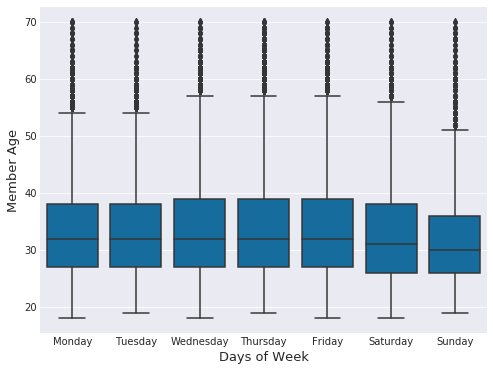

In [37]:
    # Member age by weekdays

sb.boxplot(data=gobike_copy, x='start_day_of_week', y='member_age', color=base_color);
plt.xlabel('Days of Week', fontsize = 13);
plt.ylabel('Member Age', fontsize = 13);

    Riders who rented the bikes Monday through Friday apperars to be slightly older than those who ride on weekends, this might be as a result of their commute to work and the issue of traffic congestion as was observed from the above exploration plots.

####    -  Visually exploring how weekly usage between customers and subscribers on a countplot.

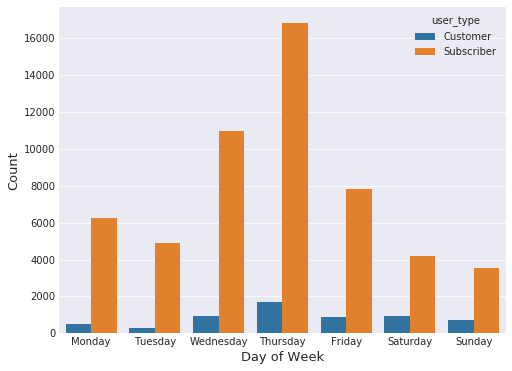

In [47]:
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# we cast 'start_day_of_week' to category dtype
weekdaycat = pd.api.types.CategoricalDtype(ordered = True, categories = weekday)
gobike_copy['start_day_of_week'] = gobike_copy['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=gobike_copy, x='start_day_of_week', hue='user_type');
plt.xlabel('Day of Week', fontsize = 13);
plt.ylabel('Count',fontsize = 13);

    Much more subscriber usage is seen as compared to the overallcasual customers. Theere's quite a drop in volume on weekends for subscribers indicating that they ride bikes for work commute during work days in the case of traffic congestion.The significant increase of use by customers on weekends can be related to leisure, touring and relaxing or workout purposes.

#### - the length of trip for customers versus subscribers.

In [39]:
#mean km grouping by user-type
gobike_copy.groupby('user_type')['distance_km'].mean()

user_type
Customer      1.705386
Subscriber    1.484438
Name: distance_km, dtype: float64

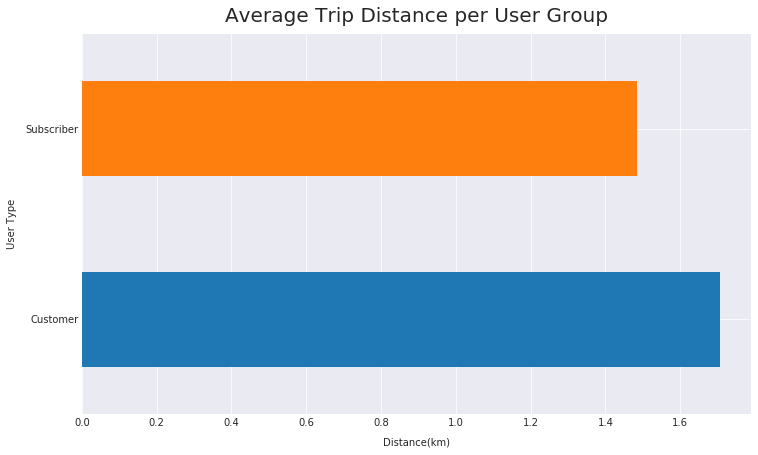

In [40]:
# plotting the length of trip for user_type and distance_km
ax = gobike_copy.groupby('user_type')['distance_km'].mean().plot(kind='barh', figsize=(12,7))
ax.set_title('Average Trip Distance per User Group', fontsize=20, y=1.015)
ax.set_ylabel('User Type', labelpad=8)
ax.set_xlabel('Distance(km)', labelpad=10);

    The horizontal bar chart demonstrates that on average, customers tend to take longer rides than subscribers. The mean for user_type follows;
    Customer      1.705386, approximately 11.71 km
    Subscriber    1.484438, approximately 1.50 km

#### - How does trip duration distribution vary between customers and subscribers?

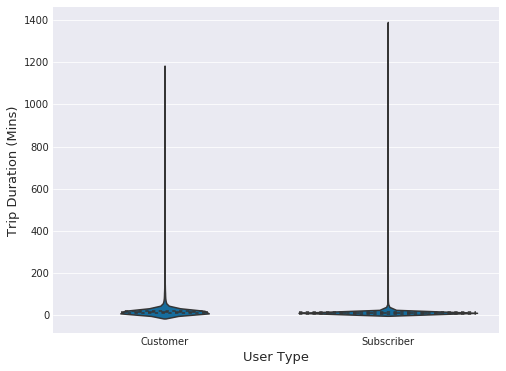

In [41]:
sb.violinplot(data=gobike_copy, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type', fontsize = 13);
plt.ylabel('Trip Duration (Mins)', fontsize = 13);

    The trip duration distribution is much narrower for subscribers as compared to casual riders on the shorter or quicker trip end overall. Subscribers tend have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

    Here  are some relationships observed in this part of the project. 
    the relationships were observed by 
    > Exploring member age by weekdays using a boxplot
    > Exploring trip duration distribution vary between customers and subscribers
    > The length of trip for customers versus subscribers
    > Visually exploring how weekly usage between customers and subscribers on a countplot
    
    For short, It was interesting to observe the different usage behaviors between subscribers and customers. Customers show trends towards being more casual in their usage, as they ride more on the weekends, and subscribers appear to use the service on a Monday-Friday basis. It seems likely that subscribers are using the service to commute to work. However, it was surprising to see that customers, on average, take longer rides than subscribers.
    
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

    > It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides
    > Also, its interesting seeing how customers tend to take longer rides than subscribers and the drop in volume on weekends for subscribers.

## Multivariate Exploration

####  In this part, we'll be create plots of three or more variables to investigate our data even further. 

#### - the distances traveled by each age, separated by gender.

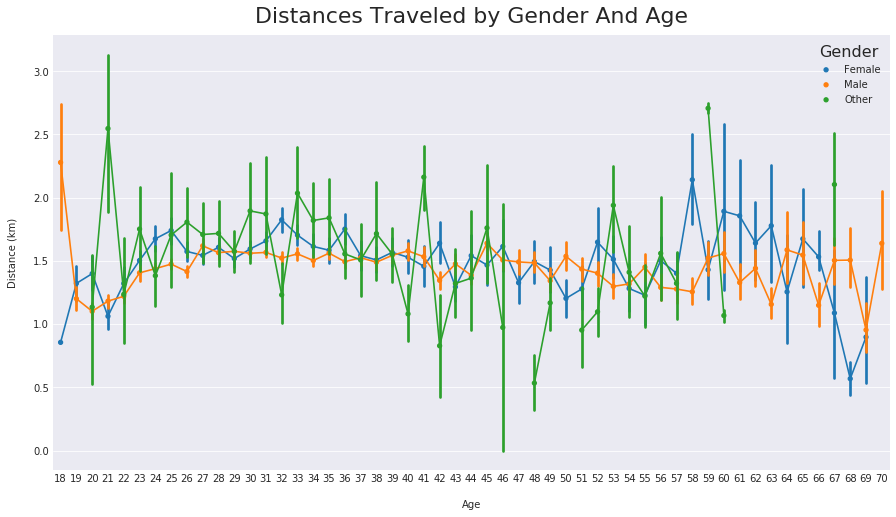

In [42]:
#The following graph is a line graph of the distances traveled by each age, separated by gender.

plt.figure(figsize=(15,8))
ax = sb.pointplot(x='member_age', y='distance_km', hue='member_gender', scale=.6, data=gobike_copy)
plt.title('Distances Traveled by Gender And Age', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Distance (km)', labelpad=16)
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();

    It is seen that the other gender has the greatest fluctuation, especially in the ages of40 years and beyond. 
    The male gender appears to have a steady movement along the line plot from the age 18 to 59 , with a massive fall within the ages of 69. 
            The ages of female at 57 years recorded a peak distance of 2.2 km
            The ages of other at 60 years recored a peak distance of about 2.7 km
            The ages of males at 18 years recored a peak distance of about 2.3 km

#### - visualizing how the hourly usage vary during weekdays for customers and subscribers

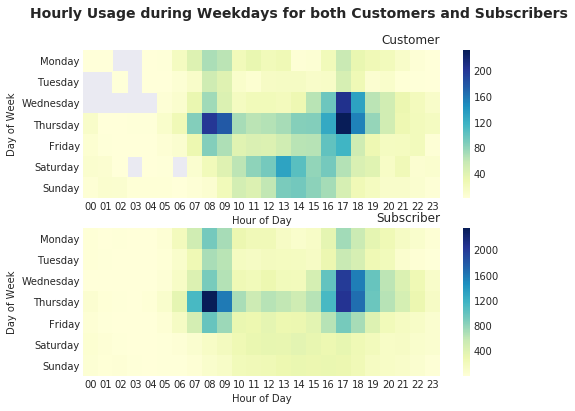

In [43]:
#plotting a heatmap

plt.suptitle('Hourly Usage during Weekdays for both Customers and Subscribers',  fontsize=14, fontweight='semibold')

# heatmap 1 for Customers
plt.subplot(2, 1, 1)
customers = gobike_copy.query('user_type == "Customer"')
cust_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
cust_counts = cust_counts.reset_index(name='count')
cust_counts = cust_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(cust_counts, cmap="YlGnBu");
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

#heatmap 2 for Subscribers
plt.subplot(2, 1, 2)
subscribers = gobike_copy.query('user_type == "Subscriber"')
susc_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
susc_counts = susc_counts.reset_index(name='count')
susc_counts = susc_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(susc_counts, cmap="YlGnBu");
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

    The heatmaps between the two types of riders clearly demonstrate highly distinct usage patterns and habits. Customers ride a lot on weekends, especially in the afternoon, but subscribers use the system substantially throughout the weekdays, from Monday through Friday. When used for commuting to work, subscribers make a lot of trips around 8–9am and 17–18pm on workdays, but customers typically use more in the late afternoon around 17pm Monday through Friday. In addition to usage intent and habit, it might also be related to the local traffic conditions during these rush hours.

#### - How average trip duration vary in weekdays between customers and subscribers

Text(0.5,1,'Trip durationin (in weekdays) between User Types')

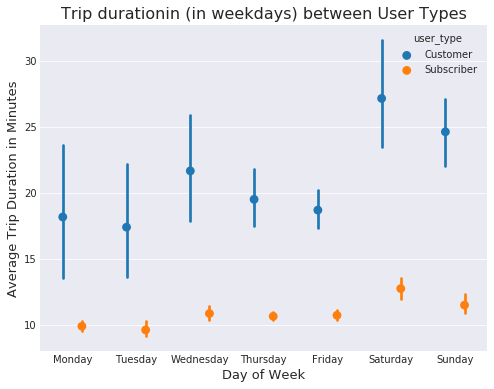

In [44]:
# plotting a pointplot
sb.pointplot(data = gobike_copy, x='start_day_of_week', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week',  fontsize = 13);
plt.ylabel('Average Trip Duration in Minutes', fontsize = 13);
plt.title('Trip durationin (in weekdays) between User Types', fontsize = 16)

    The above plot shows that on every day of the week, subscribers take short journeys than customers. On Saturdays and Sundays, both user types' trip lengths clearly rise compared to weekends, notably for casual bikers. Monday through Friday, subscribers' usage had a relatively stable average length and appeared to be more effective than customers overall.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

    > The relationship between the various variables plotted is seen collectively, and information is displayed simultaneously, strengthening some of the patterns identified in the preceding bivariate investigation as well as the univariate study. Subscribers' efficient or short periods of consumption are consistent with their high concentration during Monday through Friday rush hours, showing that the use is mostly for commuting to work. Customers clearly utilize the bike sharing system considerably differently than subscribers, frequently on weekends and in the afternoons, likely for leisure or city tours, as seen by the more flexible and lax pattern of their usage.

### Were there any interesting or surprising interactions between features?

    > When features interact with one another and make sense when considered as a whole, there isn't much to surprise about. While there are disproportionately more female riders and records than male ones, the usage habits of men and women are not as different or visible throughout the investigation. If there were more female data, it would be interesting to observe how male and female users of the system varied from one another. Unlike the subscribers, this occurs frequently on weekends and in the afternoon, perhaps for leisure or city tours.

## Conclusions
    This parts detailes a brief summary of our explorations and analysis.
    Project title: The Ford GoBike System(in San Francisco) Exploration 
    - introduction : gave a brief description of our datset
    Preliminary wrangling - the data was assessed after gethering, loaded and read into a pandas df , after whuch some quality 
    issues were assessed and cleaned.
    - The structure and feature in our dataset were briefly discussed together with features that support out investigations further on.
    -Three main explorations with different types of plots and observatios or findings are followed.
    -Univariate explorations
    -Multivariate explorations
    -Multivariate explorations
    Insights gained after each exploration was marked down in a cell to detail our findings.

References

https://stackoverflow.com/questions/47048636/markers-in-seaborn-lmplot

https://seaborn.pydata.org/